<a href="https://colab.research.google.com/github/mgnarag/binarization-autoencoder/blob/main/model8_b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
!ls drive/My\ Drive
file_path = "/content/drive/My Drive/Architectural_designs/one quadrant/"

'107.1 syllabus 1SAY1920 FINAL.gdoc'
'1C-01 Narag et al (1).pdf'
'1C-01 Narag et al.pdf'
'1FA971504AC646559D05A8ED6341AFB3[1025340].png'
 20220802_182749.heic
 20220802_182831.heic
 20220802_183259.heic
 20220803_125819.heic
 20220803_125842.heic
 20220803_144229.heic
 20220803_144422.heic
 20220803_160724.heic
 20220803_160751.heic
 20220803_165240.heic
 20220803_165318.heic
 20220803_174701.heic
 20220803_174706.heic
 20220804_175217.heic
 20220804_175443.heic
 20220804_175616.heic
 20220804_181917.heic
 20220804_182007.heic
 20220804_182117.heic
 2S22-23_LE3-Regular-Set-A-FINAL-KEY.pdf
'A4_Physics 71 TWHFU-3_gradesheet (1).pdf'
'A4_Physics 71 TWHFU-3_officialgrades (1).pdf'
'A4_Physics 71 TWHFU-3_officialgrades.gdoc'
 Acosta_GeronimoAllanJerome_Reduced_Fees.pdf
'Acosta_Reduced Fees_merge (2) (1)_sgdJARC (1).pdf'
'Acosta_Reduced Fees_merge (2) (1)_sgdJARC.pdf'
 Alkuino_GabrielSedrick_Reduced_Fees.pdf
'Alkunio_Reduced Fees_merge.pdf'
'Annex 1 (copy of Journal).pdf'
'Annex 2 (Proof of 

In [4]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Mon Jun 19 10:28:57 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0    44W / 400W |      0MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 89.6 gigabytes of available RAM

You are using a high-RAM runtime!


In [6]:

import time
import pandas as pd


import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf


from PIL import Image, ImageOps
import os
import numpy as np

epoch = 100
model_number = 8
size = 256

def crop(im):
    width, height = im.size
    data = []

    for j in np.arange(0,int(height/size)+1,0.19):
        for i in np.arange(0,int(width/size)+1,0.19):
            im1 = im.crop((0 + (size*i), 0 + (size*j), size + (size*i), size + (size*j)))
            im1 = np.array(im1)
            im1 = im1.astype(np.float32)
            im1 = im1/255
            data.append(im1)
    return data



'''
train_input = np.array(crop(Image.open(file_path + "final_input_train.png")))
print("Done reading the  training input of size = ", train_input.shape)

train_output = np.array(crop(Image.open(file_path + "cleaned_output_train.png")))
print("Done reading the  training out of size = ", train_output.shape)

test_input = np.array(crop(Image.open(file_path + "final_input_test.png")))
print("Done reading the  test input of size = ", test_input.shape)

test_output = np.array(crop(Image.open(file_path + "cleaned_output_test.png")))
print("Done reading the  test output of size = ", test_output.shape)
'''

train_input = np.array(crop(ImageOps.grayscale(Image.open(file_path + "final_input_train.png"))))
print("Done reading the  training input of size = ", train_input.shape)

train_output = np.array(crop(ImageOps.grayscale(Image.open(file_path + "cleaned_output_train.png"))))
print("Done reading the  training out of size = ", train_output.shape)


test_input = np.array(crop(ImageOps.grayscale(Image.open(file_path + "final_input_test.png"))))
print("Done reading the  test input of size = ", test_input.shape)

test_output = np.array(crop(ImageOps.grayscale(Image.open(file_path + "cleaned_output_test.png"))))
print("Done reading the  test output of size = ", test_output.shape)


Done reading the  training input of size =  (22644, 256, 256)
Done reading the  training out of size =  (22644, 256, 256)
Done reading the  test input of size =  (9792, 256, 256)
Done reading the  test output of size =  (9792, 256, 256)


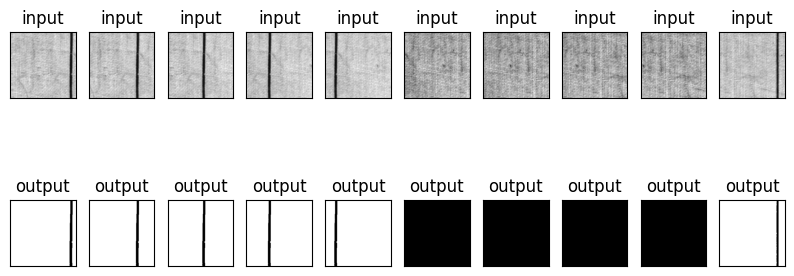

In [7]:

n = 10
plt.figure(figsize=(10, 4))
for i in range(0,10):

    ax = plt.subplot(2, n, i + 1)
    plt.title("input")
    plt.imshow((train_input[i+10]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    bx = plt.subplot(2, n, i + n + 1)
    plt.title("output")
    plt.imshow((train_output[i+10]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()



In [8]:
start = time.time()
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

class autoenc(Model):
  def __init__(self):
    super(autoenc, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(size, size, 1)),
      layers.Conv2D(64, (3, 3), activation='relu', padding='same', strides=2)])

    self.decoder = tf.keras.Sequential([
      layers.Conv2DTranspose(64, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = autoenc()


autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

model = autoencoder.fit(train_input, train_output,
                epochs=epoch,
                shuffle=True,
                validation_data=(test_input, test_output))

autoencoder.encoder.summary()



autoencoder.save(file_path + '1 Models/' + 'autoencoder_'+str(model_number) + '_b')

loss = model.history['loss']
loss = pd.DataFrame(loss)
loss.to_csv(file_path + '2 Loss/'+'loss_'+str(model_number)+'_b'+'.csv')
val_loss = model.history['val_loss']
val_loss = pd.DataFrame(val_loss)
val_loss.to_csv(file_path + '3 Validation loss/' +'val_loss_'+str(model_number)+'_b'+'.csv')

# record end time
end = time.time()

print("The time of execution of above program is :",
      (end-start), "seconds")


Epoch 1/100
708/708 [==============================] - 42s 41ms/step - loss: 0.0230 - val_loss: 0.0091
Epoch 2/100
708/708 [==============================] - 22s 31ms/step - loss: 0.0099 - val_loss: 0.0057
Epoch 3/100
708/708 [==============================] - 22s 32ms/step - loss: 0.0089 - val_loss: 0.0057
Epoch 4/100
708/708 [==============================] - 22s 32ms/step - loss: 0.0081 - val_loss: 0.0060
Epoch 5/100
708/708 [==============================] - 22s 32ms/step - loss: 0.0075 - val_loss: 0.0050
Epoch 6/100
708/708 [==============================] - 22s 32ms/step - loss: 0.0071 - val_loss: 0.0050
Epoch 7/100
708/708 [==============================] - 22s 31ms/step - loss: 0.0068 - val_loss: 0.0049
Epoch 8/100
708/708 [==============================] - 22s 32ms/step - loss: 0.0066 - val_loss: 0.0045
Epoch 9/100
708/708 [==============================] - 22s 32ms/step - loss: 0.0064 - val_loss: 0.0041
Epoch 10/100
708/708 [==============================] - 22s 32ms/step - l

The time of execution of above program is : 2269.444736480713 seconds
